In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

sns.set_theme(style="whitegrid")

In [32]:
df_activemq_dv8 = pd.read_excel('./dv8-reports/activemq/dv8-analysis-result/anti-pattern/anti-pattern-costs/anti-pattern-cost.xlsx')
df_archiva_dv8 = pd.read_excel('./dv8-reports/archiva/dv8-analysis-result/anti-pattern/anti-pattern-costs/anti-pattern-cost.xlsx')
df_depends_dv8 = pd.read_excel('./dv8-reports/depends/dv8-analysis-result/anti-pattern/anti-pattern-costs/anti-pattern-cost.xlsx')
df_druid_dv8 = pd.read_excel('./dv8-reports/druid/dv8-analysis-result/anti-pattern/anti-pattern-costs/anti-pattern-cost.xlsx')
df_geode_dv8 = pd.read_excel('./dv8-reports/geode/dv8-analysis-result/anti-pattern/anti-pattern-costs/anti-pattern-cost.xlsx')
df_jackrabbit_dv8 = pd.read_excel('./dv8-reports/jackrabbit/dv8-analysis-result/anti-pattern/anti-pattern-costs/anti-pattern-cost.xlsx')
df_jena_dv8 = pd.read_excel('./dv8-reports/jena/dv8-analysis-result/anti-pattern/anti-pattern-costs/anti-pattern-cost.xlsx')
df_karaf_dv8 = pd.read_excel('./dv8-reports/karaf/dv8-analysis-result/anti-pattern/anti-pattern-costs/anti-pattern-cost.xlsx')
df_phoenix_dv8 = pd.read_excel('./dv8-reports/phoenix/dv8-analysis-result/anti-pattern/anti-pattern-costs/anti-pattern-cost.xlsx')
df_solr_dv8 = pd.read_excel('./dv8-reports/solr/dv8-analysis-result/anti-pattern/anti-pattern-costs/anti-pattern-cost.xlsx')


df_activemq_fag = pd.read_csv('./results/activemq/results.csv')
df_archiva_fag = pd.read_csv('./results/archiva/results.csv')
df_depends_fag = pd.read_csv('./results/depends/results.csv')
df_druid_fag = pd.read_csv('./results/druid/results.csv')
df_geode_fag = pd.read_csv('./results/geode/results.csv')
df_jackrabbit_fag = pd.read_csv('./results/jackrabbit/results.csv')
df_jena_fag = pd.read_csv('./results/jena/results.csv')
df_karaf_fag = pd.read_csv('./results/karaf/results.csv')
df_phoenix_fag = pd.read_csv('./results/phoenix/results.csv')
df_solr_fag = pd.read_csv('./results/solr/results.csv')




In [33]:
df_activemq_dv8.head()


,Type,FileCount,%Files
0,Clique,274.0,0.062216
1,PackageCycle,784.0,0.178020
2,UnhealthyInheritance,2123.0,0.482062
3,NaN,NaN,NaN
4,Project Total,4404.0,NaN


In [34]:
df_activemq_fag.head()

,basic_num_nodes,basic_num_edges,basic_density,basic_avg_in_degree,basic_avg_out_degree,basic_std_in_degree,basic_std_out_degree,basic_max_in_degree,basic_max_out_degree,basic_num_strongly_connected_components,...,clustering_in,clustering_out,smallworld_sigma,smallworld_C_orig,smallworld_L_orig,smallworld_C_random_mean,smallworld_L_random_mean,smallworld_C_random_std,smallworld_L_random_std,smallworld_is_small_world
0,4375,24298,0.00127,5.553829,5.553829,31.536229,6.775233,1090,90,4045,...,0.033876,0.131483,4.652937,0.139708,3.567179,0.042181,5.011326,0.00127,0.083036,True


In [35]:
# 1. Process DV8 Data to get %Files and a correct Total

dv8_list = [

    ('activemq', df_activemq_dv8), ('archiva', df_archiva_dv8), ('druid', df_druid_dv8), ('depends', df_depends_dv8),

    ('geode', df_geode_dv8), ('jackrabbit', df_jackrabbit_dv8), ('jena', df_jena_dv8),

    ('karaf', df_karaf_dv8), ('phoenix', df_phoenix_dv8), ('solr', df_solr_dv8)

]


processed_dv8 = []


for name, df in dv8_list:

    # Get the Total File Count from the "Project Total" row before dropping it

    # This is the denominator for our "Total Anti-Pattern %"

    total_files = df.loc[df['Type'] == 'Project Total', 'FileCount'].values[0]

    

    # Remove metadata rows

    temp_df = df.dropna(subset=['Type']).copy()

    temp_df = temp_df[temp_df['Type'] != 'Project Total']

    

    # Pivot using %Files as the value

    pivoted = temp_df.set_index('Type')[['%Files']].T

    pivoted.columns.name = None

    pivoted.index = [0]

    

    # Calculate the Total Anti-Pattern % 

    # (Sum of all anti-pattern FileCounts / Total Project Files)

    sum_anti_pattern_files = temp_df['FileCount'].sum()

    pivoted['Total_AntiPattern'] = sum_anti_pattern_files / total_files

    

    pivoted.insert(0, 'project_name', name)

    processed_dv8.append(pivoted)


df_dv8_combined = pd.concat(processed_dv8, ignore_index=True)

In [36]:
import pandas as pd
from IPython.display import display, Markdown

# 1. Define your project list (mapping names to their respective DataFrames)
# Assuming these DataFrames (df_activemq_dv8, etc.) are already loaded in your environment
dv8_list = [
    ('activemq', df_activemq_dv8), ('archiva', df_archiva_dv8), ('druid', df_druid_dv8), 
    ('depends', df_depends_dv8), ('geode', df_geode_dv8), ('jackrabbit', df_jackrabbit_dv8), 
    ('jena', df_jena_dv8), ('karaf', df_karaf_dv8), ('phoenix', df_phoenix_dv8), ('solr', df_solr_dv8)
]

processed_dv8 = []

for name, df in dv8_list:
    # A. Capture the 'Project Total' file count as the denominator
    total_files = df.loc[df['Type'] == 'Project Total', 'FileCount'].values[0]
    
    # B. Clean the data: remove NaNs and the 'Project Total' row to isolate anti-patterns
    temp_df = df.dropna(subset=['Type']).copy()
    temp_df = temp_df[temp_df['Type'] != 'Project Total']
    
    # C. Pivot the table so each 'Type' (Clique, PackageCycle, etc.) becomes a column
    # We use the '%Files' column for the values
    pivoted = temp_df.set_index('Type')[['%Files']].T
    pivoted.columns.name = None
    pivoted.index = [0]
    
    # D. Calculate the "Total_AntiPattern" Density 
    # (Sum of unique files with smells / Total files in project)
    sum_anti_pattern_files = temp_df['FileCount'].sum()
    pivoted['Total_AntiPattern_Density'] = sum_anti_pattern_files / total_files
    
    # E. Add the project name for identification and store
    pivoted.insert(0, 'project_name', name)
    processed_dv8.append(pivoted)

# 2. Consolidate all individual project rows into one Master DataFrame
df_dv8_summary = pd.concat(processed_dv8, ignore_index=True)

# 3. Optional: Fill NaN values with 0 (if a project doesn't have a specific smell type)
df_dv8_summary = df_dv8_summary.fillna(0)

# 4. Render and Display as Markdown
markdown_output = df_dv8_summary.to_markdown(index=False, floatfmt=".4f")
display(Markdown(f"### Master Summary: Architectural Smells Across Projects\n\n{markdown_output}"))



### Master Summary: Architectural Smells Across Projects

| project_name   |   Clique |   PackageCycle |   UnhealthyInheritance |   Total_AntiPattern_Density |
|:---------------|---------:|---------------:|-----------------------:|----------------------------:|
| activemq       |   0.0622 |         0.1780 |                 0.4821 |                      0.7223 |
| archiva        |   0.0078 |         0.1261 |                 0.3187 |                      0.4526 |
| druid          |   0.1920 |         0.2550 |                 0.5779 |                      1.0249 |
| depends        |   0.0620 |         0.2299 |                 0.5073 |                      0.7993 |
| geode          |   0.2146 |         0.4580 |                 0.3767 |                      1.0493 |
| jackrabbit     |   0.0855 |         0.2339 |                 0.3997 |                      0.7191 |
| jena           |   0.2146 |         0.4580 |                 0.3767 |                      1.0493 |
| karaf          |   0.0070 |         0.1254 |                 0.1533 |                      0.2857 |
| phoenix        |   0.2104 |         0.6701 |                 0.3569 |                      1.2374 |
| solr           |   0.1743 |         0.4214 |                 0.4798 |                      1.0755 |

In [37]:
# 2. Process FAG Data

fag_list = [

    ('activemq', df_activemq_fag), ('archiva', df_archiva_fag), ('druid', df_druid_fag), ('depends', df_depends_fag),

    ('geode', df_geode_fag), ('jackrabbit', df_jackrabbit_fag), ('jena', df_jena_fag),

    ('karaf', df_karaf_fag), ('phoenix', df_phoenix_fag), ('solr', df_solr_fag)

]


processed_fag = []

for name, df in fag_list:

    temp_df = df[['smallworld_sigma']].copy()

    temp_df.insert(0, 'project_name', name)

    processed_fag.append(temp_df)


df_fag_combined = pd.concat(processed_fag, ignore_index=True)

In [38]:
import pandas as pd
from IPython.display import display, Markdown

# 1. Consolidate all projects into a single list
all_processed_data = []

for name, df in fag_list:
    # Capture all columns, add the project name at the start
    temp_df = df.copy()
    if 'project_name' not in temp_df.columns:
        temp_df.insert(0, 'project_name', name)
    all_processed_data.append(temp_df)

# 2. Create the master dataframe containing all 10 projects
df_final_summary = pd.concat(all_processed_data, ignore_index=True)

# 3. Render the entire table as Markdown
# Using index=False to keep the table clean
Markdown_Table = df_final_summary.to_markdown(index=False)

# 4. Display in the notebook
display(Markdown(f"### Machine Readable Summary of All Projects\n\n{Markdown_Table}"))

### Machine Readable Summary of All Projects

| project_name   |   basic_num_nodes |   basic_num_edges |   basic_density |   basic_avg_in_degree |   basic_avg_out_degree |   basic_std_in_degree |   basic_std_out_degree |   basic_max_in_degree |   basic_max_out_degree |   basic_num_strongly_connected_components |   basic_num_weakly_connected_components |   avg_path_length |   in_degree_median |   out_degree_median |   clustering_overall |   clustering_cycle |   clustering_middleman |   clustering_in |   clustering_out |   smallworld_sigma |   smallworld_C_orig |   smallworld_L_orig |   smallworld_C_random_mean |   smallworld_L_random_mean |   smallworld_C_random_std |   smallworld_L_random_std | smallworld_is_small_world   |
|:---------------|------------------:|------------------:|----------------:|----------------------:|-----------------------:|----------------------:|-----------------------:|----------------------:|-----------------------:|------------------------------------------:|----------------------------------------:|------------------:|-------------------:|--------------------:|---------------------:|-------------------:|-----------------------:|----------------:|-----------------:|-------------------:|--------------------:|--------------------:|---------------------------:|---------------------------:|--------------------------:|--------------------------:|:----------------------------|
| activemq       |              4375 |             24298 |      0.00126974 |               5.55383 |                5.55383 |               31.5362 |                6.77523 |                  1090 |                     90 |                                      4045 |                                      10 |           3.56718 |                  1 |                   3 |             0.139708 |         0.00464597 |               0.136092 |       0.0338765 |        0.131483  |            4.65294 |            0.139708 |             3.56718 |                 0.0421813  |                    5.01133 |               0.00126981  |                 0.0830357 | True                        |
| archiva        |               991 |              5496 |      0.00560193 |               5.54591 |                5.54591 |               11.3535 |                8.11681 |                   131 |                     68 |                                       978 |                                       6 |           1.33333 |                  2 |                   2 |             0.140954 |         0          |               0.215985 |       0.062325  |        0.0727552 |           41.1439  |            0.140954 |             1.33333 |                 0.0162456  |                    6.32268 |               0.00135814  |                 0.31433   | True                        |
| druid          |              5161 |             32211 |      0.00120954 |               6.24123 |                6.24123 |               63.4274 |               10.0448  |                  2082 |                    362 |                                      3900 |                                      10 |           4.41692 |                  0 |                   6 |             0.237478 |         0.00508515 |               0.117364 |       0.0286624 |        0.233054  |            1.3228  |            0.237478 |             4.41692 |                 0.162066   |                    3.98733 |               0.00322267  |                 0.0588557 | True                        |
| depends        |               252 |              1155 |      0.0182603  |               4.58333 |                4.58333 |               12.8562 |                3.76768 |                   111 |                     19 |                                       234 |                                       5 |           2.59524 |                  1 |                   4 |             0.175264 |         0.00263479 |               0.219106 |       0.0449767 |        0.167146  |            3.46116 |            0.175264 |             2.59524 |                 0.0824426  |                    4.22531 |               0.00496821  |                 0.389062  | True                        |
| geode          |              8434 |             82909 |      0.0011657  |               9.83033 |                9.83033 |               48.8258 |               13.2298  |                  1738 |                    353 |                                      6143 |                                      28 |           5.11066 |                  1 |                   6 |             0.147552 |         0.00750392 |               0.172308 |       0.0591794 |        0.120151  |            5.06588 |            0.147552 |             5.11066 |                 0.0273465  |                    4.79832 |               0.000596934 |                 0.0407087 | True                        |
| jackrabbit     |              2780 |             14227 |      0.00184154 |               5.11763 |                5.11763 |               17.9954 |                8.0465  |                   437 |                    146 |                                      2495 |                                       3 |           4.57094 |                  1 |                   3 |             0.180202 |         0.0059108  |               0.257221 |       0.0708676 |        0.136968  |           12.2579  |            0.180202 |             4.57094 |                 0.0185689  |                    5.77361 |               0.000866876 |                 0.127318  | True                        |
| jena           |              6472 |             45958 |      0.00109737 |               7.10105 |                7.10105 |               32.9941 |                8.22495 |                  1492 |                    139 |                                      4310 |                                      11 |           6.04007 |                  1 |                   5 |             0.159156 |         0.00822205 |               0.217457 |       0.0582403 |        0.141891  |            7.85328 |            0.159156 |             6.04007 |                 0.0185206  |                    5.51982 |               0.000542532 |                 0.037858  | True                        |
| karaf          |               259 |               441 |      0.00659962 |               1.7027  |                1.7027  |                3.255  |                1.75322 |                    29 |                     12 |                                       258 |                                      23 |           1       |                  1 |                   1 |             0.121608 |         0          |               0.107457 |       0.0149303 |        0.0842574 |           21.3178  |            0.121608 |             1       |                 0.00808144 |                    1.41667 |               0.00292873  |                 0.731247  | True                        |
| phoenix        |              2373 |             19405 |      0.00344748 |               8.17741 |                8.17741 |               31.5256 |               11.8789  |                   505 |                    171 |                                      1514 |                                       5 |           4.28001 |                  2 |                   5 |             0.205939 |         0.0152628  |               0.239579 |       0.0684513 |        0.207381  |            3.81318 |            0.205939 |             4.28001 |                 0.0542701  |                    4.30084 |               0.00137932  |                 0.0516288 | True                        |
| solr           |              4100 |             33178 |      0.00197419 |               8.0922  |                8.0922  |               40.4047 |               10.2828  |                  1043 |                    311 |                                      3109 |                                       6 |           4.50214 |                  1 |                   5 |             0.192083 |         0.0116882  |               0.241975 |       0.0671384 |        0.168518  |            4.35984 |            0.192083 |             4.50214 |                 0.047706   |                    4.87498 |               0.00116662  |                 0.066176  | True                        |

In [39]:
df_dv8_combined.head()

,project_name,Clique,PackageCycle,UnhealthyInheritance,Total_AntiPattern
0,activemq,0.062216,0.178020,0.482062,0.722298
1,archiva,0.007820,0.126100,0.318671,0.452590
2,druid,0.191998,0.254977,0.577910,1.024885
3,depends,0.062044,0.229927,0.507299,0.799270
4,geode,0.214612,0.457991,0.376712,1.049315


In [40]:
df_fag_combined.head()

,project_name,smallworld_sigma
0,activemq,4.652937
1,archiva,41.143903
2,druid,1.322799
3,depends,3.461161
4,geode,5.065878


In [41]:
df_final = pd.merge(df_dv8_combined, df_fag_combined, on='project_name')
print(df_final.info())

print(df_final.isna().sum())
print(df_final[df_final['smallworld_sigma'].isna()]['project_name'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   project_name          10 non-null     object 
 1   Clique                10 non-null     float64
 2   PackageCycle          10 non-null     float64
 3   UnhealthyInheritance  10 non-null     float64
 4   Total_AntiPattern     10 non-null     float64
 5   smallworld_sigma      10 non-null     float64
dtypes: float64(5), object(1)
memory usage: 612.0+ bytes
None
project_name            0
Clique                  0
PackageCycle            0
UnhealthyInheritance    0
Total_AntiPattern       0
smallworld_sigma        0
dtype: int64
Series([], Name: project_name, dtype: object)


In [42]:
display(df_final)

,project_name,Clique,PackageCycle,UnhealthyInheritance,Total_AntiPattern,smallworld_sigma
0,activemq,0.062216,0.178020,0.482062,0.722298,4.652937
1,archiva,0.007820,0.126100,0.318671,0.452590,41.143903
2,druid,0.191998,0.254977,0.577910,1.024885,1.322799
3,depends,0.062044,0.229927,0.507299,0.799270,3.461161
4,geode,0.214612,0.457991,0.376712,1.049315,5.065878
5,jackrabbit,0.085461,0.233912,0.399728,0.719101,12.257913
6,jena,0.214612,0.457991,0.376712,1.049315,7.853284
7,karaf,0.006969,0.125436,0.153310,0.285714,21.317767
8,phoenix,0.210397,0.670078,0.356938,1.237413,3.813178
9,solr,0.174338,0.421432,0.479777,1.075546,4.359841


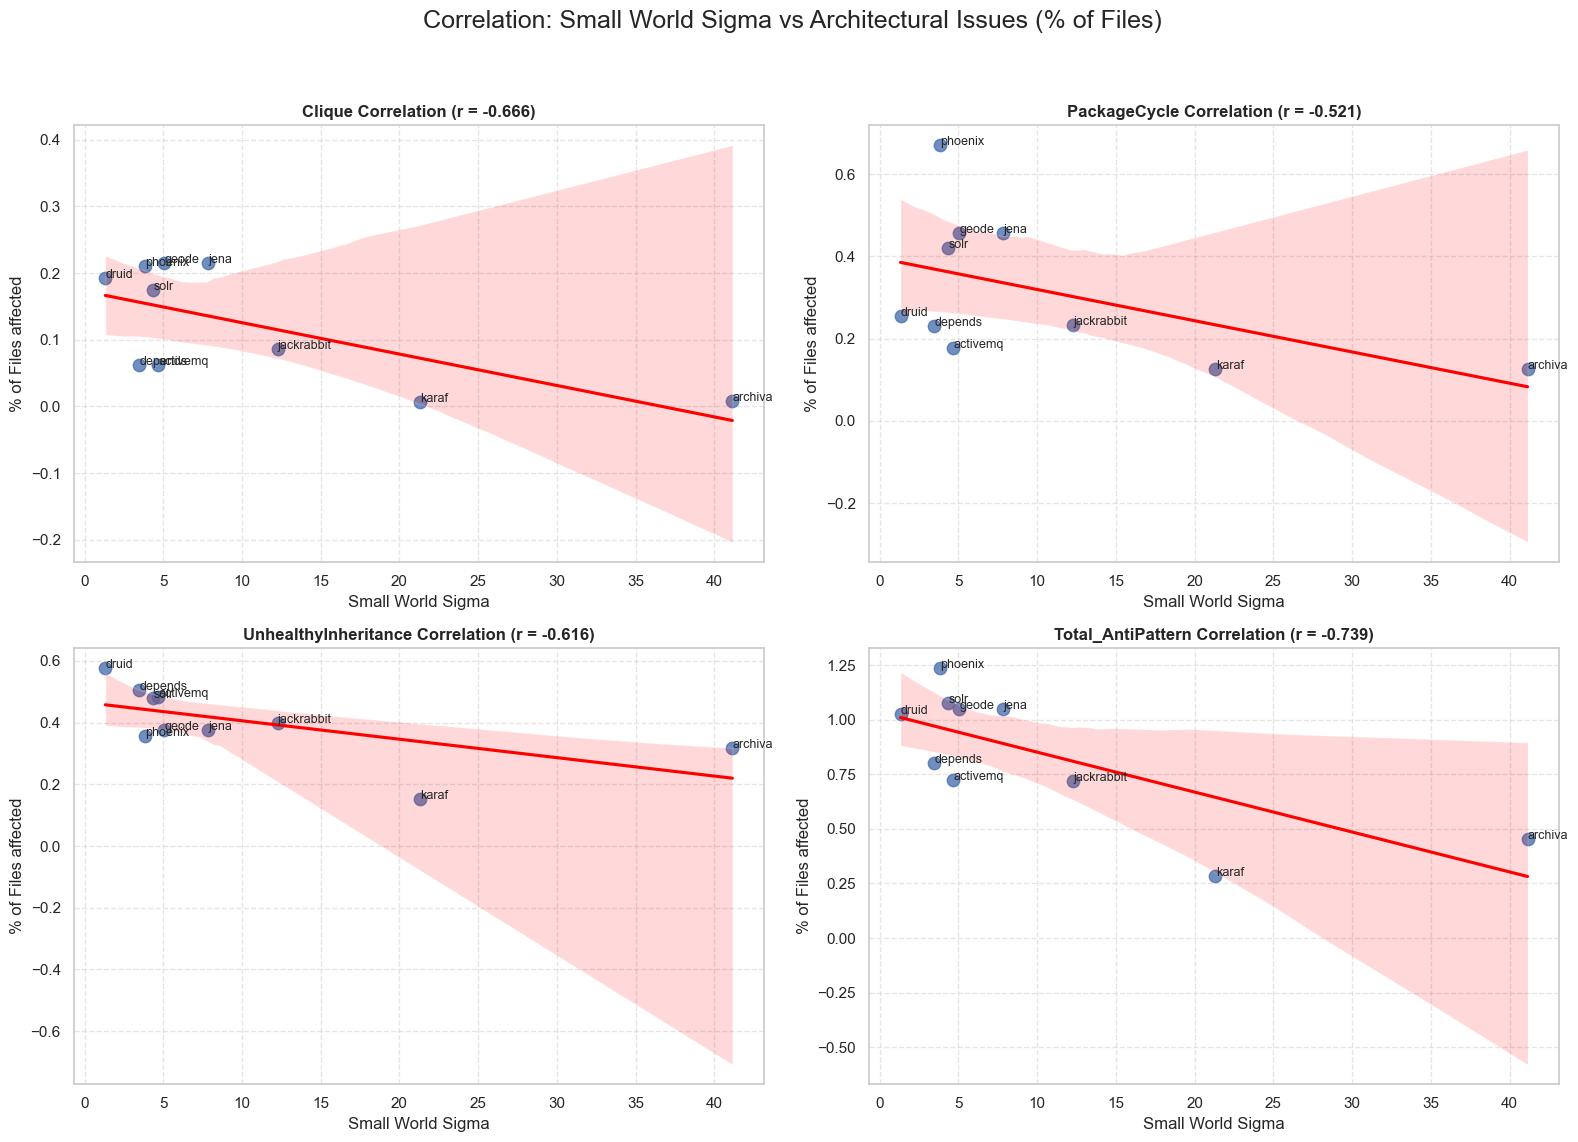

In [43]:
# Create 4 plots

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

fig.suptitle('Correlation: Small World Sigma vs Architectural Issues (% of Files)', fontsize=18)


patterns = [

    ('Clique', axes[0, 0]), 

    ('PackageCycle', axes[0, 1]), 

    ('UnhealthyInheritance', axes[1, 0]), 

    ('Total_AntiPattern', axes[1, 1])

]


for col, ax in patterns:

    # Calculate Pearson Correlation

    r_val, _ = pearsonr(df_final['smallworld_sigma'], df_final[col])

    

    # Plotting

    sns.regplot(x='smallworld_sigma', y=col, data=df_final, ax=ax, 

                scatter_kws={'s': 80, 'alpha': 0.8}, line_kws={'color': 'red'})

    

    # Add labels for projects

    for i in range(df_final.shape[0]):

        ax.text(df_final.smallworld_sigma[i] + 0.02, df_final[col][i], 

                df_final.project_name[i], fontsize=9)

    

    ax.set_title(f'{col} Correlation (r = {r_val:.3f})', fontweight='bold')

    ax.set_ylabel('% of Files affected')

    ax.set_xlabel('Small World Sigma')

    ax.grid(True, linestyle='--', alpha=0.5)


plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [44]:
import pandas as pd

from scipy.stats import pearsonr


# 1. Define the columns to analyze

issue_columns = ['Clique', 'PackageCycle', 'UnhealthyInheritance', 'Total_AntiPattern']

target_var = 'smallworld_sigma'


# 2. Generate the machine-readable summary using a list comprehension

stats_data = []


for col in issue_columns:

    # Ensure data is numeric and drop NaNs for the calculation

    valid_data = df_final[[target_var, col]].dropna()

    

    r_val, p_val = pearsonr(valid_data[target_var], valid_data[col])

    

    stats_data.append({

        'metric_x': target_var,

        'metric_y': col,

        'pearson_r': round(r_val, 4),

        'p_value': round(p_val, 6),

        'is_significant_95': p_val < 0.05,

        'sample_size': len(valid_data)

    })


# 3. Create the Results DataFrame

df_stats_summary = pd.DataFrame(stats_data)


# 4. Output results in various machine-readable formats

print("--- Correlation Summary Table ---")

display(df_stats_summary)


# Export to CSV (Standard for spreadsheets/databases)

df_stats_summary.to_csv('correlation_analysis_results.csv', index=False)


# Export to JSON (Standard for web/API integration)

df_stats_summary.to_json('correlation_analysis_results.json', orient='records', indent=4)


# Export to Markdown (Standard for GitHub/Documentation)

print("\n--- Markdown Table ---")

print(df_stats_summary.to_markdown(index=False))

--- Correlation Summary Table ---


,metric_x,metric_y,pearson_r,p_value,is_significant_95,sample_size
0,smallworld_sigma,Clique,-0.6657,0.035624,True,10
1,smallworld_sigma,PackageCycle,-0.5205,0.122946,False,10
2,smallworld_sigma,UnhealthyInheritance,-0.6162,0.057817,False,10
3,smallworld_sigma,Total_AntiPattern,-0.7392,0.014571,True,10



--- Markdown Table ---
| metric_x         | metric_y             |   pearson_r |   p_value | is_significant_95   |   sample_size |
|:-----------------|:---------------------|------------:|----------:|:--------------------|--------------:|
| smallworld_sigma | Clique               |     -0.6657 |  0.035624 | True                |            10 |
| smallworld_sigma | PackageCycle         |     -0.5205 |  0.122946 | False               |            10 |
| smallworld_sigma | UnhealthyInheritance |     -0.6162 |  0.057817 | False               |            10 |
| smallworld_sigma | Total_AntiPattern    |     -0.7392 |  0.014571 | True                |            10 |


In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import os
import pandas as pd

# Merge the architectural and quality metrics DataFrames
merged_df = pd.merge(
    df_final_summary,  # Architectural metrics DataFrame
    df_dv8_summary,    # Quality metrics DataFrame
    on='project_name'  # Common column for merging
)

# Create output directories for plots
output_dir_pos = 'positive_correlation_plots'
output_dir_neg = 'negative_correlation_plots'
os.makedirs(output_dir_pos, exist_ok=True)
os.makedirs(output_dir_neg, exist_ok=True)

# Define architectural metrics to plot
architectural_metrics = [
    'basic_num_nodes', 'basic_num_edges', 'basic_density', 
    'basic_avg_in_degree', 'basic_avg_out_degree', 
    'basic_std_in_degree', 'basic_std_out_degree',
    'basic_max_in_degree', 'basic_max_out_degree',
    'basic_num_strongly_connected_components', 
    'basic_num_weakly_connected_components',
    'avg_path_length', 'in_degree_median', 'out_degree_median',
    'clustering_overall', 'clustering_cycle', 'clustering_middleman',
    'clustering_in', 'clustering_out', 'smallworld_sigma',
    'smallworld_C_orig', 'smallworld_L_orig', 'smallworld_C_random_mean',
    'smallworld_L_random_mean', 'smallworld_C_random_std', 
    'smallworld_L_random_std', 'smallworld_is_small_world'
]

# Define quality metrics
quality_metrics = ['Clique', 'PackageCycle', 'UnhealthyInheritance', 'Total_AntiPattern_Density']

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 14)  # Slightly larger figure size

# Generate plots for each architectural metric
for arch_metric in architectural_metrics:
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle(f'Correlation: {arch_metric} vs Architectural Issues (% of Files)', 
                 fontsize=18, fontweight='bold')
    
    # Define subplot patterns
    patterns = [
        ('Clique', axes[0, 0]), 
        ('PackageCycle', axes[0, 1]), 
        ('UnhealthyInheritance', axes[1, 0]), 
        ('Total_AntiPattern_Density', axes[1, 1])
    ]
    
    for col, ax in patterns:
        # Calculate Pearson Correlation
        r_val, _ = pearsonr(merged_df[arch_metric], merged_df[col])
        
        # Plotting
        sns.regplot(x=arch_metric, y=col, data=merged_df, ax=ax, 
                    scatter_kws={'s': 80, 'alpha': 0.8}, line_kws={'color': 'red'})
        
        # Add labels for projects
        for i in range(merged_df.shape[0]):
            ax.text(
                    merged_df[arch_metric][i],          # x position: no offset
                    merged_df[col][i],                  # y position
                    merged_df.project_name[i],          # label text
                    fontsize=9,
                    ha='center',                        # Center horizontally
                    va='center',                        # Center vertically
                    color='black',                      # (Optional) for clarity on red dots
                    bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.7)  # (Optional) background for readability
                )
        
        # Set titles, labels, and grid
        ax.set_title(f'{col} Correlation (r = {r_val:.3f})', fontweight='bold')
        ax.set_ylabel('% of Files affected')
        ax.set_xlabel(arch_metric.replace('_', ' ').title())
        ax.grid(True, linestyle='--', alpha=0.5)
    
    # Adjust subplot spacing
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.subplots_adjust(wspace=0.3, hspace=0.3)  # Add more space between subplots
    
    # Save plot based on correlation type
    if r_val >= 0:
        filename = f'{output_dir_pos}/{arch_metric}_correlation.png'
    else:
        filename = f'{output_dir_neg}/{arch_metric}_correlation.png'
    
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()
    
    print(f'Saved: {filename}')

print(f'\nAll correlation plots saved to {output_dir_pos}/ and {output_dir_neg}/')

Saved: positive_correlation_plots/basic_num_nodes_correlation.png
Saved: positive_correlation_plots/basic_num_edges_correlation.png
Saved: negative_correlation_plots/basic_density_correlation.png
Saved: positive_correlation_plots/basic_avg_in_degree_correlation.png
Saved: positive_correlation_plots/basic_avg_out_degree_correlation.png
Saved: positive_correlation_plots/basic_std_in_degree_correlation.png
Saved: positive_correlation_plots/basic_std_out_degree_correlation.png
Saved: positive_correlation_plots/basic_max_in_degree_correlation.png
Saved: positive_correlation_plots/basic_max_out_degree_correlation.png
Saved: positive_correlation_plots/basic_num_strongly_connected_components_correlation.png
Saved: negative_correlation_plots/basic_num_weakly_connected_components_correlation.png
Saved: positive_correlation_plots/avg_path_length_correlation.png
Saved: negative_correlation_plots/in_degree_median_correlation.png
Saved: positive_correlation_plots/out_degree_median_correlation.png
Sa

C:\Users\zorzi\AppData\Local\Temp\ipykernel_12948\1000866290.py:60: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  r_val, _ = pearsonr(merged_df[arch_metric], merged_df[col])


Saved: negative_correlation_plots/smallworld_is_small_world_correlation.png

All correlation plots saved to positive_correlation_plots/ and negative_correlation_plots/
